In [7]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../DuReader_reformatted/DuReader_for_dbCombinedPara500-150-sample10000-epoch-100-Docker.csv', sep='\t', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 504558 to 1897621
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   question       9912 non-null   object 
 1   doc_title      9912 non-null   object 
 2   doc_paragraph  9912 non-null   object 
 3   src            9912 non-null   object 
 4   time_avg       9912 non-null   float64
 5   time_var       9912 non-null   float64
dtypes: float64(2), object(4)
memory usage: 542.1+ KB


In [9]:
avg_time = df['time_avg']
avg_time

504558     0.014503
78116      0.010398
3485593    0.011239
3130695    0.012915
3957127    0.011449
             ...   
2435491    0.014011
1967380    0.021801
2966682    0.014711
3576132    0.012686
1897621    0.017955
Name: time_avg, Length: 9912, dtype: float64

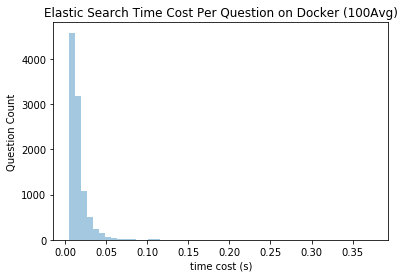

In [34]:
sns.distplot(avg_time, kde=False)
plt.title('Elastic Search Time Cost Per Question on Docker (100Avg)')
plt.xlabel('time cost (s)')
plt.ylabel('Question Count')
plt.savefig('./DuReader/ES_TimeCost_Distribution_Docker.png', dpi=300)

In [18]:
len(avg_time[avg_time>0.1])

29

In [12]:
np.mean(avg_time)

0.015622934959798818

In [25]:
list_avg_time = list(avg_time)
list_avg_time.sort(reverse=True)
list_avg_time


[0.3747017526626587,
 0.18289114952087399,
 0.16141614437103272,
 0.1606790566444397,
 0.15990981578826904,
 0.15741132736206054,
 0.14895762920379638,
 0.14578837871551514,
 0.13640230655670166,
 0.12561142683029175,
 0.12440676927566527,
 0.12396754026412965,
 0.119079487323761,
 0.11714278936386108,
 0.11512359619140625,
 0.11511659860610962,
 0.11179635047912598,
 0.11115782260894776,
 0.11000280380249024,
 0.1097602152824402,
 0.10947587490081788,
 0.1090493392944336,
 0.10572513341903686,
 0.10560522556304933,
 0.10452101230621337,
 0.10356288194656373,
 0.1019077730178833,
 0.10167654275894164,
 0.1009663224220276,
 0.09917642831802367,
 0.09647406339645384,
 0.0961554479598999,
 0.09550992488861083,
 0.09381872177124023,
 0.09323713779449463,
 0.0921846342086792,
 0.09041766881942748,
 0.09017666101455687,
 0.08902664422988893,
 0.08705848455429077,
 0.08520143270492554,
 0.08444142580032349,
 0.08180196285247802,
 0.07992027044296264,
 0.07989698648452759,
 0.07974329948425292

In [32]:
tp_dict = {0: '9999', 1:'999', 2:'99', 3:'90'}
for i in range(0, 4):
    print('TP', tp_dict[i], ':', list_avg_time[10 ** i])

TP 9999 : 0.18289114952087399
TP 999 : 0.12440676927566527
TP 99 : 0.05901573181152344
TP 90 : 0.027096617221832275
